# Classification - Loan Eligibility Prediction

## Context: 

Credit risk is nothing but the default in payment of any loan by the borrower. In Banking sector this is an important factor to be considered before approving the loan of an applicant.Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.

## Objective:

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

## Attributes Information:

* Variable:	------------------------------     Description
* Loan_ID:	-------------------------------          Unique Loan ID
* Gender:	  --------------------------------        Male/ Female
* Married:	-------------------------------          Applicant married (Y/N)
* Dependents:--------------------------	      Number of dependents
* Education:----------------------------      Applicant Education (Graduate/ Under Graduate)
* Self_Employed:--------------------	  Self employed (Y/N)
* ApplicantIncome:-----------------	  Applicant income
* CoapplicantIncome:------------- Coapplicant income
* LoanAmount:------------------------	      Loan amount in thousands
* Loan_Amount_Term:------------  Term of loan in months
* Credit_History:----------------------	  credit history meets guidelines
* Property_Area:----------------------	  Urban/ Semi Urban/ Rural
* Loan_Status:-------------------------	      Loan approved (Y/N)



In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.model_selection import train_test_split

import numpy as np
from scipy import stats

# calculate accuracy measures and confusion matrix
from sklearn import metrics

In [3]:
df = pd.read_csv('CreditRisk.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,1


In [4]:
df.shape

(614, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    int64  
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 62.5+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,614.0,141.166124,88.340630,0.0,98.0,125.0,164.75,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0
Loan_Status,614.0,0.687296,0.463973,0.0,0.0,1.0,1.00,1.0


In [7]:
df.nunique() # Number of unique values in a column

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           204
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [8]:
cr_df = df.drop('Loan_ID', axis =1 ) 
cr_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,0,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,1


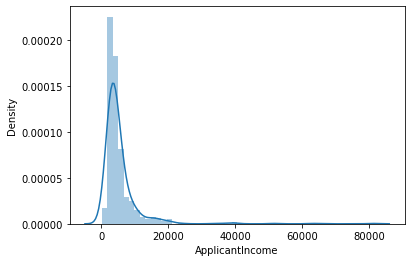

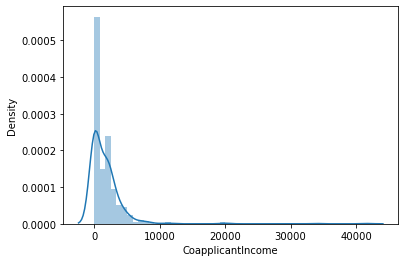

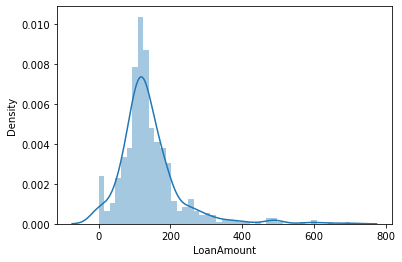

In [9]:
# distplot for continous columns
for i in ['ApplicantIncome','CoapplicantIncome','LoanAmount']:
    sns.distplot(df[i])
    plt.show()

In [10]:
cr_df['Loan_Amount_Term'].value_counts(normalize = True)

360.0    0.853333
180.0    0.073333
480.0    0.025000
300.0    0.021667
84.0     0.006667
240.0    0.006667
120.0    0.005000
36.0     0.003333
60.0     0.003333
12.0     0.001667
Name: Loan_Amount_Term, dtype: float64

In [11]:
#The Loan_Amount_Term is highly skewed - so we will delete this column
cr_df.drop(['Loan_Amount_Term'], axis=1, inplace=True)

In [12]:
cr_df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount             int64
Credit_History       float64
Property_Area         object
Loan_Status            int64
dtype: object

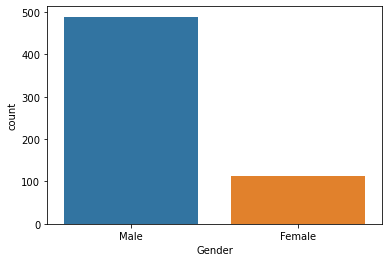

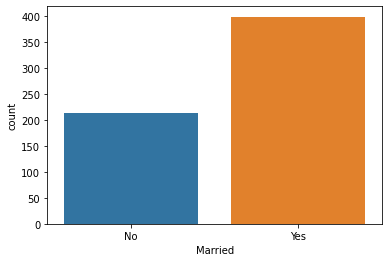

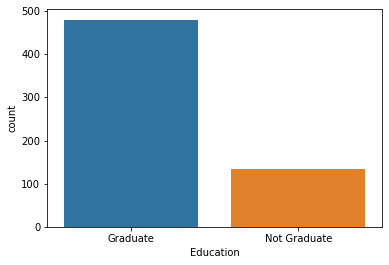

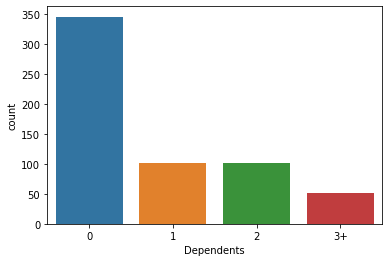

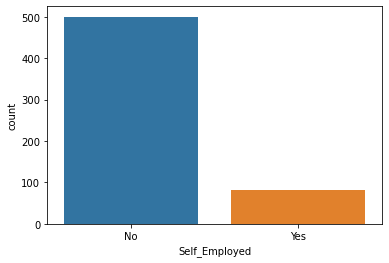

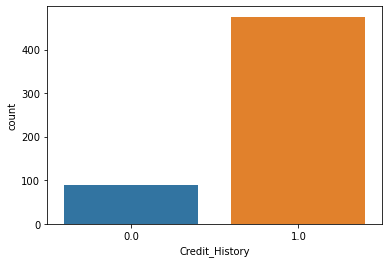

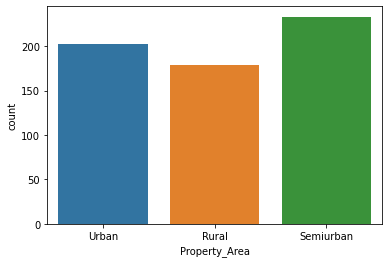

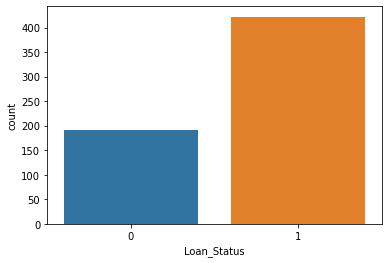

In [13]:
for i in ['Gender','Married','Education','Dependents','Self_Employed','Credit_History','Property_Area','Loan_Status']:
    sns.countplot(i, data=cr_df)
    plt.show()


In [14]:
cr_df['Loan_Status'].value_counts(normalize = True)

1    0.687296
0    0.312704
Name: Loan_Status, dtype: float64

In [15]:
cr_df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [16]:
# treat missing values
cr_df['Credit_History'].fillna(value = 0, inplace = True) 
cr_df['Dependents'].fillna(value = '0', inplace = True) 
cr_df['Self_Employed'].fillna(value = 'No', inplace = True) 
cr_df[cr_df['CoapplicantIncome'] == 0].Gender.fillna(value = 'Female', inplace = True)
cr_df['Gender'].fillna(value= 'Male', inplace =True)


In [17]:
cr_df.isnull().sum()

Gender               0
Married              3
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [18]:
# Drawing relationship between Loan_Status, Gender, Property_Area, Married

cr_df.groupby(['Loan_Status','Gender','Property_Area'])['Married'].value_counts()

Loan_Status  Gender  Property_Area  Married
0            Female  Rural          No           7
                                    Yes          3
                     Semiurban      No          12
                                    Yes          1
                     Urban          No          10
                                    Yes          4
             Male    Rural          Yes         41
                                    No          18
                     Semiurban      Yes         29
                                    No          12
                     Urban          Yes         35
                                    No          20
1            Female  Rural          No          12
                                    Yes          2
                     Semiurban      No          22
                                    Yes         19
                     Urban          No          17
                                    Yes          2
             Male    Rural          Ye

In [19]:
cr_df[cr_df['Married'].isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
104,Male,NaN,0,Graduate,No,3816,754.0,160,1.0,Urban,1
228,Male,NaN,0,Graduate,No,4758,0.0,158,1.0,Semiurban,1
435,Female,NaN,0,Graduate,No,10047,0.0,0,1.0,Semiurban,1


**Insights:**
- `When Gender is Male Loan Status is 1 and Propert_Area is Urban then mostly they are married.(mode)`

In [20]:
## Replacing with mode observed in above mentioned relationship:
cr_df.loc[104,'Married'] = 'Yes'
cr_df.loc[228,'Married'] = 'Yes'
cr_df.loc[435,'Married'] = 'No'

In [21]:
cr_df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

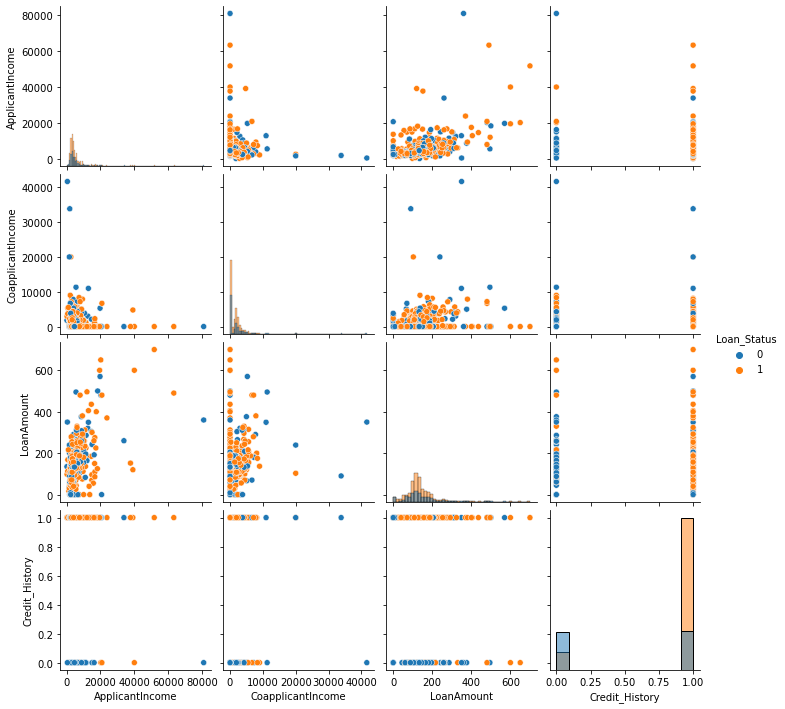

In [22]:
# pairplot with Loan_Status hue

sns.pairplot(cr_df, hue="Loan_Status", diag_kind="hist")
plt.show()

In [23]:
# Median 
cr_df.groupby(by = "Loan_Status").median()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History
Loan_Status,,,,
0,3833.5,268.0,126.5,1.0
1,3812.5,1239.5,125.0,1.0


In [24]:
# Mean
cr_df.groupby(by = "Loan_Status").mean()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History
Loan_Status,,,,
0,5446.078125,1877.807292,142.557292,0.505208
1,5384.068720,1504.516398,140.533175,0.895735


In [25]:
pd.crosstab(cr_df['Gender'],cr_df['Loan_Status'],normalize='index')

Loan_Status,0,1
Gender,,
Female,0.330357,0.669643
Male,0.308765,0.691235


In [26]:
pd.crosstab(cr_df['Married'],cr_df['Loan_Status'],normalize='index')

Loan_Status,0,1
Married,,
No,0.369159,0.630841
Yes,0.282500,0.717500


In [27]:
pd.crosstab(cr_df['Education'],cr_df['Loan_Status'],normalize='index')

Loan_Status,0,1
Education,,
Graduate,0.291667,0.708333
Not Graduate,0.388060,0.611940


In [28]:
pd.crosstab(cr_df['Self_Employed'],cr_df['Loan_Status'],normalize='columns')

Loan_Status,0,1
Self_Employed,,
No,0.864583,0.867299
Yes,0.135417,0.132701


**Insights:**
- `Self Employed people have same distribution, We should check how this feature influences final model using coefficients`

In [29]:
pd.crosstab(cr_df['Dependents'],cr_df['Loan_Status'],normalize='columns')

Loan_Status,0,1
Dependents,,
0,0.588542,0.585308
1,0.187500,0.156398
2,0.130208,0.180095
3+,0.093750,0.078199


Insights:Dependants have same distribution. 

In [30]:
pd.crosstab(cr_df['Property_Area'],cr_df['Loan_Status'],normalize='columns')

Loan_Status,0,1
Property_Area,,
Rural,0.359375,0.260664
Semiurban,0.281250,0.424171
Urban,0.359375,0.315166


Insights: Property_Areas have same distribution. 	

In [31]:
# Define X and Y variables

X = cr_df.drop('Loan_Status', axis =1)
Y = cr_df['Loan_Status'].astype('category')  

In [32]:
# Convert categorical vriables to dummy variables

X = pd.get_dummies(X, drop_first=True)

In [33]:
X.shape

(614, 13)

In [34]:
# Split into training and test set

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30,random_state=7)

In [35]:
from sklearn.metrics import classification_report 
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42,fit_intercept=False)
logreg.fit(X_train,Y_train)                    # fit the model on train data

LogisticRegression(fit_intercept=False, random_state=42)

In [36]:
y_predict = logreg.predict(X_test)              # Predicting the target variable on test data

In [37]:
# Observe the predicted and observed classes in a dataframe.
z = X_test.copy()

z['Observed Loan Status'] = Y_test
z['Predicted Loan Status'] = y_predict
z.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Observed Loan Status,Predicted Loan Status
220,2221,0.0,60,0.0,1,1,0,0,0,0,0,0,1,0,1
109,2071,754.0,94,1.0,1,1,0,0,1,1,0,1,0,1,1
569,3166,2064.0,104,0.0,1,1,0,0,0,0,0,0,1,0,1
330,4384,1793.0,117,1.0,1,0,1,0,0,0,0,0,1,1,1
407,2213,0.0,66,1.0,0,0,0,0,0,1,0,0,0,1,1


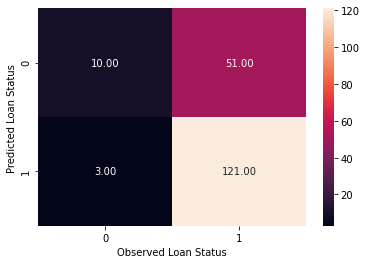

In [38]:
from sklearn.metrics import recall_score, confusion_matrix, classification_report

# function to get confusion matrix in a proper format

def draw_cm( actual, predicted ):
    cm = confusion_matrix(actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Predicted Loan Status')
    plt.xlabel('Observed Loan Status')
    plt.show()

draw_cm(Y_test, y_predict)

In [39]:

print(classification_report(Y_test, y_predict))

              precision    recall  f1-score   support

           0       0.77      0.16      0.27        61
           1       0.70      0.98      0.82       124

    accuracy                           0.71       185
   macro avg       0.74      0.57      0.54       185
weighted avg       0.73      0.71      0.64       185



In [40]:
# Coefficients
# fi = pd.DataFrame({"Feature": X_test.columns.to_list(), "Coefs": logreg.coef_})
fi = pd.DataFrame({"Feature": X_test.columns.to_list()})
fi['Coeff'] = logreg.coef_.T
fi['Coeff'] = np.round(abs(fi['Coeff']),2)
fi = fi.sort_values(by='Coeff', ascending=False)
fi

,Feature,Coeff
3,Credit_History,1.00
5,Married_Yes,0.42
11,Property_Area_Semiurban,0.36
4,Gender_Male,0.33
7,Dependents_2,0.18
12,Property_Area_Urban,0.13
10,Self_Employed_Yes,0.06
8,Dependents_3+,0.02
6,Dependents_1,0.01
0,ApplicantIncome,0.00


In [41]:
# try KNN model

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

knn = KNeighborsClassifier()
ss = StandardScaler()

# We select the best value of k for which the error rate is the least in the validation data
# Let us loop over a few values of the k to determine the best k
error_df_knn = pd.DataFrame()
features = X.columns

knn_many_split = {}

for k in range(1,15):
  train_error = [] # list of train errors
  val_error = []  # list of val errors
  knn = KNeighborsClassifier(n_neighbors=k)

  for i in range(30):
    x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size = 0.20)
    x_train = ss.fit_transform(x_train)
    x_val = ss.fit_transform(x_val) # transform the validation set
    knn.fit(x_train, y_train)

    train_error.append(1 - recall_score(y_train,knn.predict(x_train)))
    val_error.append(1 - recall_score(y_val,knn.predict(x_val)))
  
  knn_many_split[k] = (sum(train_error)/len(train_error), sum(val_error)/len(val_error))

knn_many_split

{1: (0.0, 0.21642085452412246),
 2: (0.23108736959472573, 0.38760314838665455),
 3: (0.08585528065281772, 0.13767464922350864),
 4: (0.14673433796914814, 0.22569246497378126),
 5: (0.07171479368916127, 0.11287926032456196),
 6: (0.11614324820538738, 0.14980757338455006),
 7: (0.06735093666646046, 0.09624517902939891),
 8: (0.1025377009354396, 0.1396188627511455),
 9: (0.06558561484761412, 0.09102833053011697),
 10: (0.09518049336320705, 0.10904732519948541),
 11: (0.05464007437212434, 0.07165548379571375),
 12: (0.06541520633300005, 0.07591664974089966),
 13: (0.041553323819647915, 0.05693785251633835),
 14: (0.051756377445611554, 0.07324733404038243)}

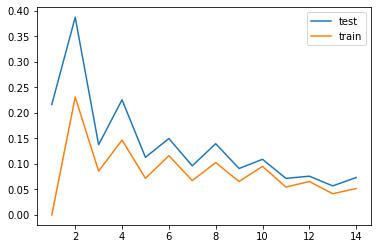

In [42]:
# Extracting k and the test error in a list for easy plotting
kltest = []
vltest = []
for k, v in knn_many_split.items():
  kltest.append(k)
  vltest.append(knn_many_split[k][1])

kltrain = []
vltrain = []

for k, v in knn_many_split.items():
  kltrain.append(k)
  vltrain.append(knn_many_split[k][0])

plt.plot(kltest, vltest, label = 'test' )
plt.plot(kltrain, vltrain, label = 'train')
plt.legend()
plt.show()

In [43]:
# k of 5 appears has the best result

knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(X_train, Y_train)

y_pred = knn.predict(X_test)
z["5NN predictions"]  = y_pred
z

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Observed Loan Status,Predicted Loan Status,5NN predictions
220,2221,0.0,60,0.0,1,1,0,0,0,0,0,0,1,0,1,0
109,2071,754.0,94,1.0,1,1,0,0,1,1,0,1,0,1,1,1
569,3166,2064.0,104,0.0,1,1,0,0,0,0,0,0,1,0,1,1
330,4384,1793.0,117,1.0,1,0,1,0,0,0,0,0,1,1,1,1
407,2213,0.0,66,1.0,0,0,0,0,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,5800,0.0,132,1.0,1,0,0,0,0,1,1,1,0,1,1,1
66,3200,2254.0,126,0.0,1,0,0,0,0,1,0,0,1,0,0,1
319,10000,0.0,155,1.0,1,1,1,0,0,0,1,0,0,0,1,1
612,7583,0.0,187,1.0,1,1,0,1,0,0,0,0,1,1,1,1


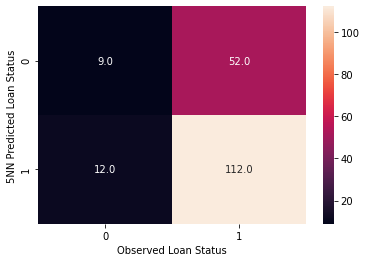

In [44]:
# Drawing the confusion matrix

sns.heatmap(confusion_matrix(Y_test,y_pred),annot=True,fmt='0.1f')
plt.ylabel('5NN Predicted Loan Status')
plt.xlabel('Observed Loan Status')
plt.show()

In [45]:
# Print the classification report 

print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.43      0.15      0.22        61
           1       0.68      0.90      0.78       124

    accuracy                           0.65       185
   macro avg       0.56      0.53      0.50       185
weighted avg       0.60      0.65      0.59       185



## <a id = "link8"></a>Business Insights 

Through logistic and KNN models, we can predict that a loan will be approved or rejected. Comparing two models, we found that logistic model fits better than KNN (K=5 in this case). The true postive observations incrases from 112 to 121 and the false negative observations drop from 52 to 51 from KNN to logistic model. The precisions increase from 0.68 to 0.70 for approved loans and overall accuracy increases from 0.65 to 0.71 from KNN to logistic. The logistic model is better, but we can certainly increase the performace of both models by getting more data relatated to the problem.